<a href="https://colab.research.google.com/github/EthanW67/Machine-Learning-Research/blob/main/Research_Projects/Research_June7th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 6/4/2024
* Input MNIST (28*28)
* Output MNIST (28*28),
* To reconstruct the input by using encoder and decoder.

In [1]:
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
transform = transforms.ToTensor()

In [3]:
train_dataset = torchvision.datasets.MNIST(root = "./data", train =True, download =True, transform = transform)
valid_dataset = torchvision.datasets.MNIST(root = "./data", train =False, download =True, transform = transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 13129249.37it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 418115.87it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3526918.11it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8504700.34it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
train_d1 = torch.utils.data.DataLoader(train_dataset, batch_size = 32)

print(len(train_d1))

1875


In [5]:
class Encoder(nn.Module):
  def __init__(self, input_size = 28*28, hidden_size1 = 128, hidden_size2 =128, z_dim =2):
    super().__init__()
    self.fc1 = nn.Linear(input_size, hidden_size1)
    self.fc2 = nn.Linear(hidden_size1, hidden_size2)
    self.fc3 = nn.Linear(hidden_size2, z_dim)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.relu(self.fc3(x))
    return x

In [6]:
class Decoder(nn.Module):
  def __init__(self, output_size = 28*28, hidden_size1 = 128, hidden_size2 = 128, z_dim =2):
    super().__init__()
    self.fc1 = nn.Linear(z_dim, hidden_size2)
    self.fc2 = nn.Linear(hidden_size2, hidden_size1)
    self.fc3 = nn.Linear(hidden_size1, output_size)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))
    return x

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [8]:

enc = Encoder().to(device)
dec = Decoder().to(device)

In [9]:
loss_fn = nn.MSELoss()
optimizer_enc = torch.optim.Adam(enc.parameters())
optimizer_dec = torch.optim.Adam(dec.parameters())

In [10]:
train_loss = []

In [11]:
"""
epochs = 10
for epoch in range(epochs):
  train_epoch_loss = 0
  for (imgs, _) in train_d1:
    imgs = imgs.to(device)

# 100, 1, 28, 28 --> (100, 28*28)
    imgs = imgs.flatten(1)
    latents = enc(imgs)
    output = dec(latents)
    loss = loss_fn(output, imgs)
    train_epoch_loss += loss.cpu().detach().numpy()
    optimizer_enc.zero_grad()
    optimizer_dec.zero_grad()
    loss.backward()
    optimizer_enc.step()
    optimizer_dec.step()
  train_loss.append(train_epoch_loss)
  """

'\nepochs = 10\nfor epoch in range(epochs):\n  train_epoch_loss = 0\n  for (imgs, _) in train_d1:\n    imgs = imgs.to(device)\n\n# 100, 1, 28, 28 --> (100, 28*28)\n    imgs = imgs.flatten(1)\n    latents = enc(imgs)\n    output = dec(latents)\n    loss = loss_fn(output, imgs)\n    train_epoch_loss += loss.cpu().detach().numpy()\n    optimizer_enc.zero_grad()\n    optimizer_dec.zero_grad()\n    loss.backward()\n    optimizer_enc.step()\n    optimizer_dec.step()\n  train_loss.append(train_epoch_loss)\n  '

In [12]:
num_epochs = 100

In [13]:
"""
for epoch in range(num_epochs):
  train_epoch_loss = 0
  for (imgs , _) in train_d1:
    imgs = imgs.to(device)
    #100 , 1 , 28 , 28 ---> (100 , 28*28)
    imgs = imgs.flatten(1)
    latents = enc(imgs)
    output = dec(latents)
    loss = loss_fn(output , imgs)
    train_epoch_loss += loss.cpu().detach().numpy()
    optimizer_enc.zero_grad()
    optimizer_dec.zero_grad()
    loss.backward()
    optimizer_enc.step()
    optimizer_dec.step()
  train_loss.append(train_epoch_loss)
  """

'\nfor epoch in range(num_epochs):\n  train_epoch_loss = 0\n  for (imgs , _) in train_d1:\n    imgs = imgs.to(device)\n    #100 , 1 , 28 , 28 ---> (100 , 28*28)\n    imgs = imgs.flatten(1)\n    latents = enc(imgs)\n    output = dec(latents)\n    loss = loss_fn(output , imgs)\n    train_epoch_loss += loss.cpu().detach().numpy()\n    optimizer_enc.zero_grad()\n    optimizer_dec.zero_grad()\n    loss.backward()\n    optimizer_enc.step()\n    optimizer_dec.step()\n  train_loss.append(train_epoch_loss)\n  '

In [14]:
for epoch in range(num_epochs):
    train_epoch_loss = 0
    for imgs, _ in train_d1:
        imgs = imgs.to(device).flatten(1)  # Move to device and flatten in one step
        latents = enc(imgs)
        output = dec(latents)
        loss = loss_fn(output, imgs)
        train_epoch_loss += loss.item()  # Use .item() to get the value and avoid additional graph tracking
        optimizer_enc.zero_grad()
        optimizer_dec.zero_grad()
        loss.backward()
        optimizer_enc.step()
        optimizer_dec.step()
    train_loss.append(train_epoch_loss)


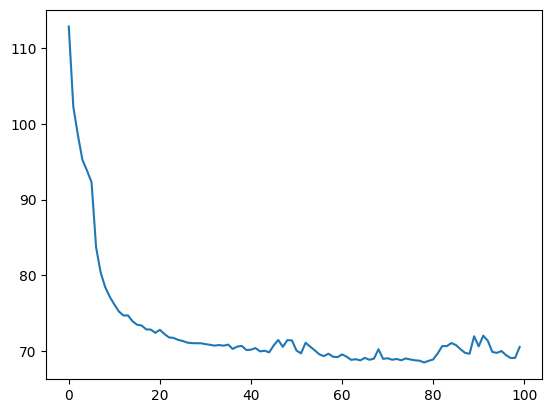

In [15]:
plt.plot(train_loss)

In [16]:

values = None
all_labels = []

with torch.no_grad():
  for (imgs , labels) in train_d1:
    imgs = imgs.to(device)
    imgs = imgs.flatten(1)
    all_labels.extend(list(labels.numpy()))
    latents = enc(imgs)
    if values is None:
      values = latents.cpu()
    else:
      values = torch.vstack([values , latents.cpu()])

In [17]:
values.shape

torch.Size([60000, 2])

In [18]:
#all_labels

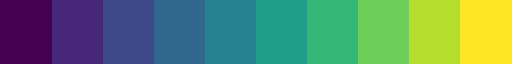

In [19]:
cmap = plt.get_cmap('viridis', 10)
cmap

In [20]:
all_labels = np.array(all_labels)
values = values.numpy()

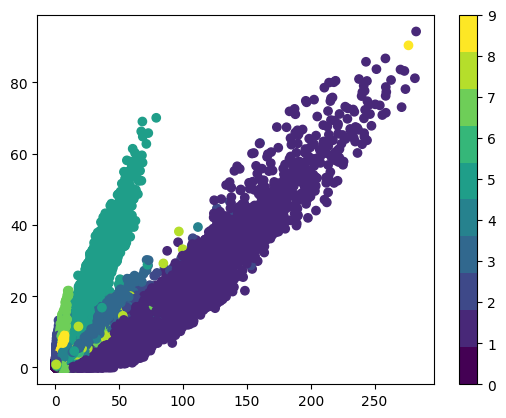

In [21]:
pc = plt.scatter(values[:, 0], values[:,1], c = all_labels, cmap = cmap)
plt.colorbar(pc)

In [22]:
all_means = {}
for i in range(10):
  inds = np.argwhere(all_labels == i)
  num_latents = values[inds].squeeze()
  mean = num_latents.mean(axis = 0)
  all_means[i] = (mean[0] , mean[1])

In [23]:
torch.Tensor(all_means[0])[None, ...].shape

torch.Size([1, 2])

In [24]:
with torch.no_grad():
  pred = dec(torch.Tensor(all_means[1])[None, ...].to(device)).cpu()
transforms.ToPILImage()(pred.reshape(1, 28, 28))